exercise 3 chapter 5

a) explain how k-fold cross validation is implemented:

Approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size.
First fold is a validation set. The method is then fit on the remaining k-1 folds. MSE is then calculated on the remaining k-1 folds. 
cross validation estimate is computed by averaging MSE values. 

b) what are the advatages and disadvatages of kfold CV relative to: 
    
    i. validation set approach: 
        Simple and easileasy to implement. 

    ii. LOOCV:
        LOOCV is the most computationally expensive. LOOCV has higher variance, but lower bias, than k-fold CV.


exercise 8 chapter 5

[1] 7.288162 7.284744

[1] 0.94 0.94
[1] 0.957 0.956
[1] 0.9539 0.9534


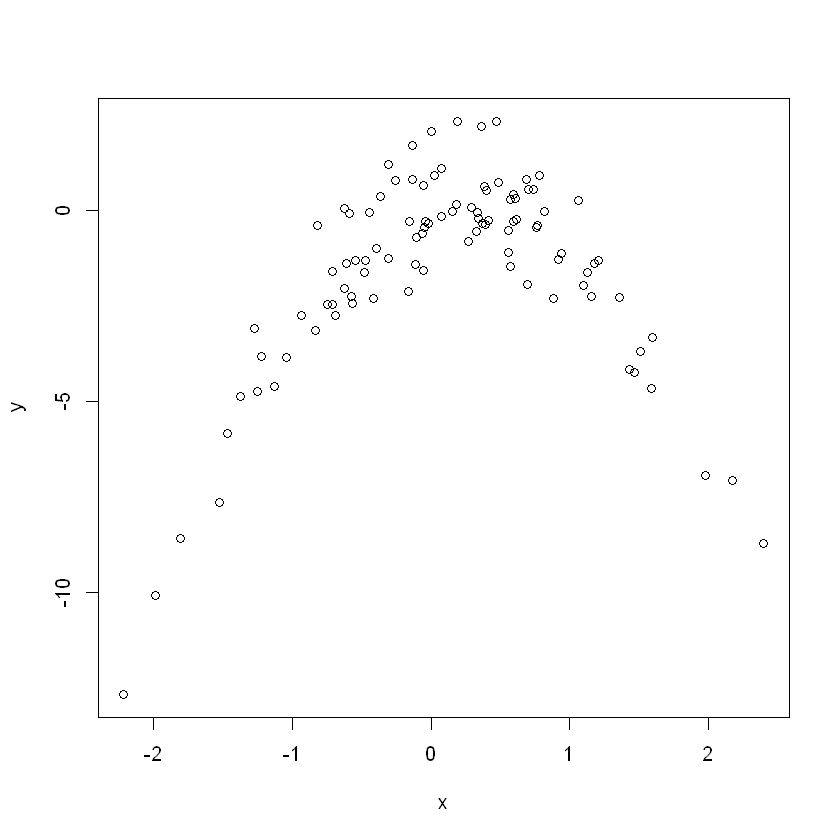

In [6]:

#a) generate a simulated dataset: 

set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm(100)

# n = 100
# p = 2

# y = x-2x^2+error

#b) scatterplot 

plot(x,y)

#c) LOOCV error using least squares 
#install.packages("boot")
library(boot)
ex8_ch5  =  data.frame(x,y)
set.seed(1)

#i
glm.fit = glm(y ~ x, data = ex8_ch5)
cv.glm(ex8_ch5,glm.fit)$delta

#ii, iii, iv    
for (i in 2:4){
    glm.fit = glm(y ~poly(x,i), data = ex8_ch5)
    print(cv.glm(ex8_ch5,glm.fit)$delta, i)
}



In [3]:
#d
ex8_ch5  =  data.frame(x,y)
set.seed(123)

#i
glm.fit = glm(y ~ x, data = ex8_ch5)
cv.glm(ex8_ch5,glm.fit)$delta

#ii, iii, iv    
for (i in 2:4){
    glm.fit = glm(y ~poly(x,i), data = ex8_ch5)
    print(cv.glm(ex8_ch5,glm.fit)$delta, i)
}

#Same results, since LOOCV evaluates n folds of a single observation.

[1] 7.288162 7.284744

[1] 0.94 0.94
[1] 0.957 0.956
[1] 0.9539 0.9534


In [ ]:
#e) quadratic polynomial 

exercise 1 chapter 6

a) Best subset selection, as it considers all possible variation of variables, choosing the best one available.
b) forward or backwards stepwise as it avoids overfitting the train data
c) 
i. True
ii. True 
iii. False 
iv. False 
v. False

exercise 9 chapter 6

In [22]:
#a
#install.packages("ISLR")
library(ISLR)
set.seed(1)

train = sample(1:nrow(College),nrow(College)/2)
test = (-train)

college_train = College[train,]
college_test = College[test,]


In [20]:
#b
lm_coll = lm(Apps ~., data= college_train)
lm_pred = predict(lm_coll, college_test)
mean((college_test[, "Apps"] - lm_pred)^2)

[1] 1135758

In [38]:
#c
#install.packages('glmnet')
library(glmnet)
a = model.matrix(Apps~., data=College)
b = College$Apps


grid = 10 ^ seq(10, -2, length=100)
ridge.mod = glmnet(a[train,], b[train], alpha = 0, lambda = grid)
ridge.pred = predict(ridge.mod, s = 4, newx = a[test,])
b.test = b[test]
mean((ridge.pred-b.test)^2)


[1] 1119867

In [ ]:
#d


exercise 10 chapter 7 


In [ ]:
#a
set.seed(1)

train = sample(1:nrow(College),nrow(College)/2)
test = (-train)

college_train = College[train,]
college_test = College[test,]

#b
gam = lm(App ~.)
